In [1]:
#패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split # 데이터 분할 : train, test
from statsmodels.formula.api import ols # 회귀분석
from statsmodels.api import qqplot, add_constant #회귀분석 상수항 추가
import statsmodels.formula.api as smf # 회귀분석
from sklearn.tree import DecisionTreeRegressor # 예측/회귀 Decision Tree
from sklearn.ensemble import RandomForestRegressor #예측/회귀
from sklearn.ensemble import GradientBoostingRegressor #예측/회귀
from sklearn.linear_model import LinearRegression #분산 팽창계수 계산할때 사용
from sklearn.feature_selection import RFE #후진제거법(변수선택)
from sklearn.preprocessing import StandardScaler #표준화 회귀계수 산출(scale 변환)
from statsmodels.tools.eval_measures import rmse # 평가함수
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor #다중공산성 확인
import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import graphviz # 나무구조 시각화
from sklearn.tree import export_graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime

#로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# scaling
from sklearn.preprocessing import StandardScaler
# 분류 SVM
from sklearn.svm import SVC
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
path ='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
#한글과 음수표시
matplotlib.rc('font',family=fontprop)
matplotlib.rc('axes',unicode_minus=False)

In [2]:
# 데이터 구성하기
tag_list = pd.read_csv('/home/piai/바탕화면/팀프로젝트/B4_제지/02_태그리스트.csv',sep=';', encoding='euc-kr')
tag_list.head()

,id,기계정보,공정번호,공정설명,한글 공정설명,태그설명,측정단위,값설명,기준최소값,기준최대값
0,TAG_001,Vacuum,1,Approach,증해 및 표백 파트,1ST NASH P/P CURRENT,Current,Measurement,12.0,18.0
1,TAG_002,Mixing Flow,1,Approach,증해 및 표백 파트,STOCK BOX CONS,Consistency,Measurement,3.5,4.2
2,TAG_003,Mixing Flow,1,Approach,증해 및 표백 파트,STOCK BOX CIC V/V,Consistency,Output,30.0,50.0
3,TAG_004,Mixing Flow,1,Approach,증해 및 표백 파트,MACHINE CHEST TO STOCK BOX 농도,Consistency,Measurement,3.5,4.2
4,TAG_005,Mixing Flow,1,Approach,증해 및 표백 파트,pm21 PCC FLOW,Flow,Measurement,0.0,320.0


In [3]:
tag_list1 = tag_list[['id','기준최소값']]
tag_list2 = tag_list[['id','기준최대값']]
tag_list2[tag_list2['id'] == 'TAG_004'].set_index("id").to_dict()['기준최대값']['TAG_004']

4.2

In [46]:
# 2개의 테이블에서 날짜 조건문 처리

stop_list = pd.read_csv('/home/piai/바탕화면/팀프로젝트/B4_제지/03_중지리스트.csv')
stop_list = stop_list.drop('Unnamed: 0', axis = 1)

stop_list['start_date'] = pd.to_datetime(stop_list['start_date'])
stop_list['end_date']   = pd.to_datetime(stop_list['end_date'])
stop_list.head()

,facility,cause,start_date,end_date
0,ALL,공정청소,2021-01-01 09:17:00,2021-01-01 10:17:00
1,ALL,계획보수,2021-01-03 08:21:00,2021-01-03 16:00:00
2,ALL,계획보수,2021-01-03 16:00:00,2021-01-03 20:25:00
3,3번 PRESS,불량중지,2021-01-03 21:39:00,2021-01-03 22:24:00
4,ALL,지종교체,2021-01-06 17:59:00,2021-01-06 18:16:00


# 불량중지 발생 원인별 빈도수 그래프

## - 공정별 불량발생 빈도 파이차트

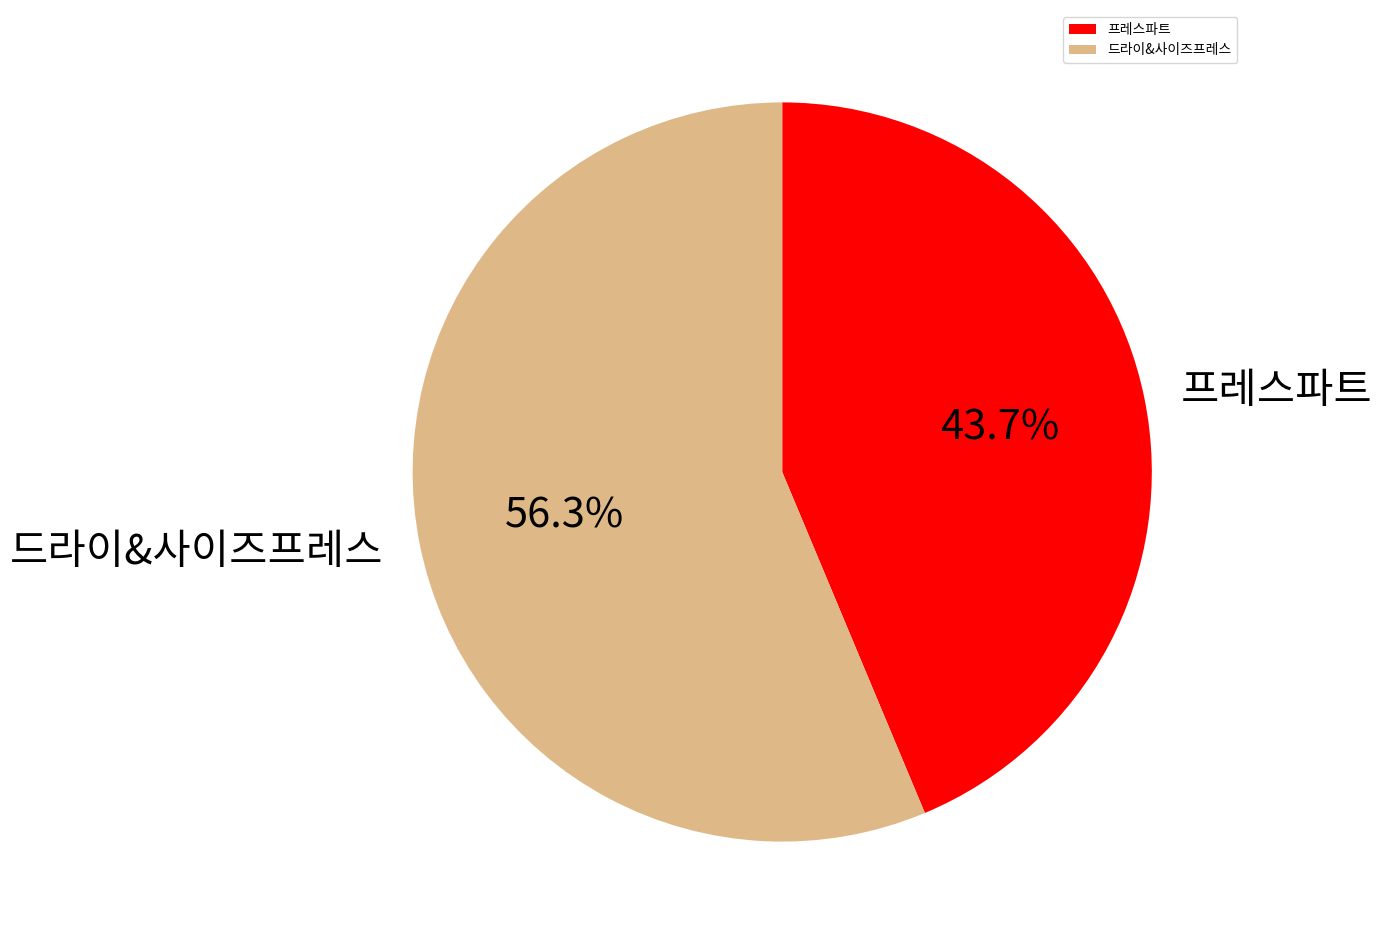

In [61]:
a = ['프레스파트','드라이&사이즈프레스']
b = [97, 125]
fig=plt.figure(figsize=(12,12))
fig.set_facecolor('white')
ax=fig.add_subplot()
pie=ax.pie(b, startangle=90,labels=a,counterclock=False,autopct = lambda p : '{:.1f}%'.format(p),
          colors=['r','burlywood'],
          textprops={'size':30})
plt.legend(loc='upper right')
plt.show()

## - 공정별 불량중지 시간

In [123]:
stop_time = stop_list[(stop_list['cause']=='불량중지')==True]
stop_time.head()
stop_time['중지시간'] = stop_time['end_date'] - stop_time['start_date']
stop_time.drop('start_date',axis=1, inplace=True)
stop_time.drop('end_date',axis=1, inplace=True)
stop_time.head()

,facility,cause,중지시간
3,3번 PRESS,불량중지,0 days 00:45:00
6,1군 DRYER,불량중지,0 days 00:28:00
8,4번 PRESS,불량중지,0 days 00:15:00
9,1군 DRYER,불량중지,0 days 00:39:00
10,4번 PRESS,불량중지,0 days 00:31:00


In [125]:
type(stop_time['중지시간'][3])

pandas._libs.tslibs.timedeltas.Timedelta

In [131]:
b = "facility.str.contains('PRESS')"
a = stop_time.query(b)
time = a['중지시간'].sum()
time

Timedelta('2 days 03:18:00')

In [135]:
c = stop_time['중지시간'].sum()
c

Timedelta('3 days 15:33:00')

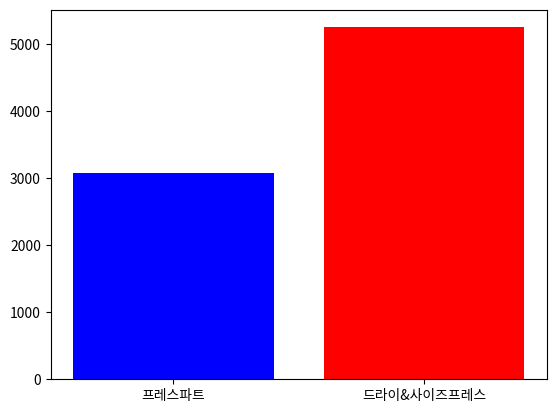

In [154]:
ab = ['프레스파트','드라이&사이즈프레스']
cd = [2*24*60+3*60+18, 3*24*60+15*60+33]
y = np.arange(2)
plt.ylim()
plt.bar(y,cd, color=['b','r'])
plt.xticks(y, ab)
plt.show()
# 프레스파트, 드라이&사이즈프레스 중지 시간

# 드라이&사이즈프레스 파트 문제 확인

# 드라이&사이즈프레스 파트 상관관계 분석

In [306]:
df = pd.read_csv('/home/piai/바탕화면/TAG 12~14 이상치/tag_end.csv', encoding='euc-kr')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.tail()

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
521363,2021-12-31 14:55:00,14.391347,3.629825,3.626222,135.838685,0.0,0.086278,0.0,100.0,92.638188,...,40.117508,39.971576,39.364815,39.912516,0.114904,0.189613,0.031485,0.035789,47.532919,정상
521364,2021-12-31 14:56:00,14.391303,3.629500,3.626215,135.852610,0.0,0.086709,0.0,100.0,92.637791,...,40.108738,39.860990,39.372183,39.959582,0.115859,0.189603,0.031483,0.035789,47.532919,정상
521365,2021-12-31 14:57:00,14.391260,3.629176,3.626208,135.866536,0.0,0.087139,0.0,100.0,92.637394,...,40.099968,39.750405,39.379555,40.006648,0.116815,0.189593,0.031481,0.035789,47.532919,정상
521366,2021-12-31 14:58:00,14.391216,3.628851,3.626202,135.880461,0.0,0.087569,0.0,100.0,92.636997,...,40.092740,40.433912,39.386927,40.053714,0.117771,0.189583,0.031479,0.035789,47.532919,정상
521367,2021-12-31 14:59:00,14.391173,3.628527,3.626195,135.894387,0.0,0.088000,0.0,100.0,92.636599,...,40.095370,39.765381,39.394299,40.039445,0.118727,0.189573,0.031476,0.035789,47.532919,정상


In [293]:
df['cause'][388906]

'정상'

In [195]:
b = ['TAG_091','TAG_092','TAG_093','TAG_094','TAG_095','TAG_096','TAG_097',
     'TAG_098','TAG_101','TAG_113','TAG_117','TAG_120','TAG_121','TAG_123','TAG_125','TAG_126','TAG_131',
     'TAG_133','TAG_134','TAG_151','TAG_155','TAG_156','TAG_157','TAG_161','TAG_166','TAG_173','TAG_174',
     'TAG_176','TAG_178','TAG_179','TAG_180','TAG_194','TAG_195','TAG_196']

process_3 = pd.concat([df['datetime'].iloc[388906:,],df.iloc[388906:,53:64],df.iloc['cause'][388906:
                                                                                            ]],axis=1)
process_3.reset_index(inplace=True)
process_3 = process_3.drop('index',axis=1)
process_3.head()

In [260]:
press1 = process_3['TAG_072']
press2 = process_3['TAG_073']
press3 = process_3['TAG_074']
press4 = process_3['TAG_075']
press5 = process_3['TAG_076']
press6 = process_3['TAG_077']
press7 = process_3['TAG_078']

In [268]:
press = pd.concat([press1,press2,press3,press4,press5,press6,press7], axis=1)

Text(0.5, 0.98, 'Press process tag')

<Figure size 640x480 with 0 Axes>

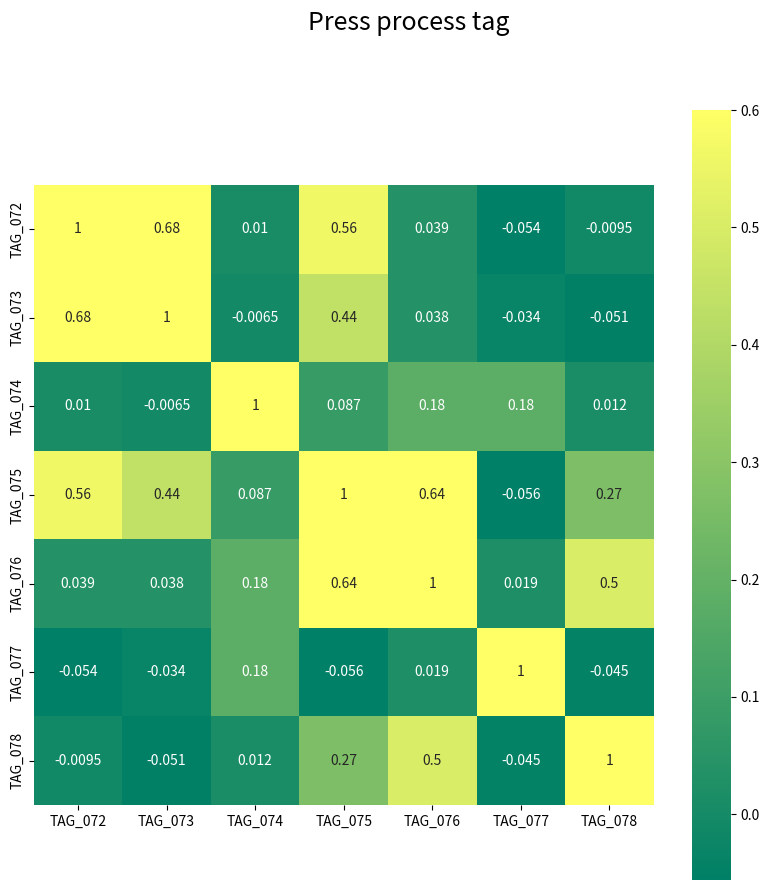

In [269]:
# MeasDate 제외한 모든 컬럼과 PM10(Target value)와의 상관관계 heatmap화
fig = plt.figure()
flg,ax = plt.subplots(figsize=[10, 10])
press_corr = press.corr()
sns.heatmap(press_corr, annot=True, square=True, vmax=0.6, cmap=plt.cm.summer)
plt.suptitle('Press process tag', fontsize=18)

In [262]:
press.head()

,TAG_072,TAG_073,TAG_074,TAG_075,TAG_076,TAG_077,TAG_078
0,89.225517,87.158203,9.051023,97.851261,101.860246,13.842146,53.362756
1,89.225598,87.158203,9.051043,97.850796,101.858968,13.842788,53.362351
2,89.225679,87.158203,9.051064,97.850331,101.857691,13.843430,53.361947
3,89.225760,87.158203,9.051085,97.849866,101.856414,13.844072,53.361542
4,89.225841,87.158203,9.051105,97.849401,101.855137,13.844714,53.361137


In [263]:
vac1 = process_3['TAG_079']
vac2 = process_3['TAG_080']
vac5 = process_3['TAG_085']

In [270]:
vac = pd.concat([vac1,vac2,vac5], axis=1)
vac.head()

,TAG_079,TAG_080,TAG_085
0,134.371261,100.0,534.233622
1,134.398748,100.0,534.498790
2,134.426232,100.0,533.901356
3,134.453718,100.0,533.303924
4,134.481205,100.0,532.706491


Text(0.5, 0.98, 'Press process tag')

<Figure size 640x480 with 0 Axes>

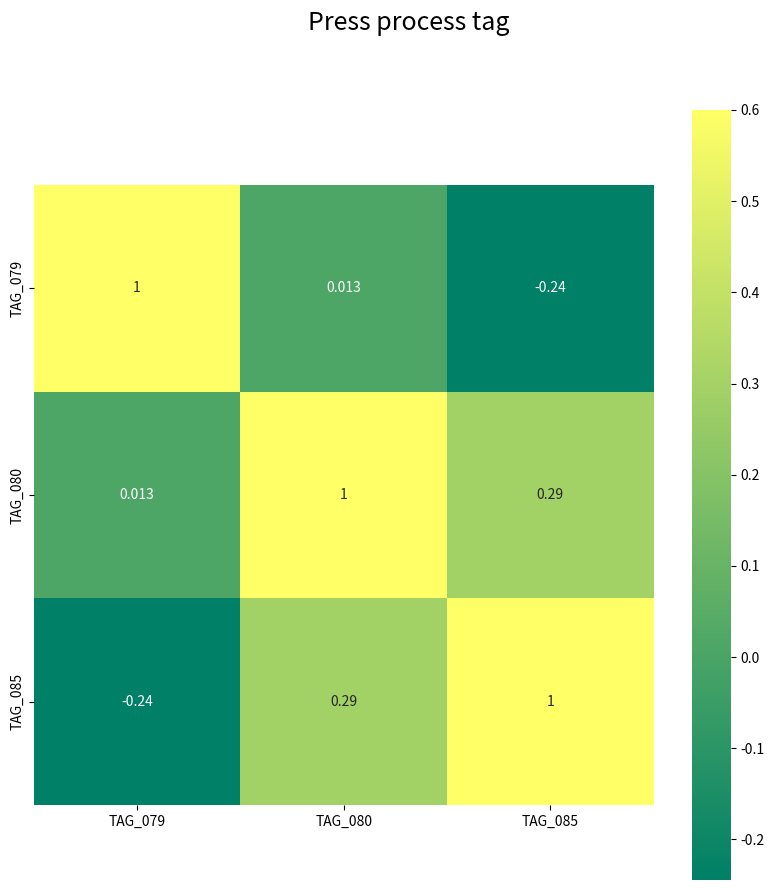

In [271]:
# MeasDate 제외한 모든 컬럼과 PM10(Target value)와의 상관관계 heatmap화
fig = plt.figure()
flg,ax = plt.subplots(figsize=[10, 10])
vac_corr = vac.corr()
sns.heatmap(vac_corr, annot=True, square=True, vmax=0.6, cmap=plt.cm.summer)
plt.suptitle('Press process tag', fontsize=18)

In [272]:
chem = process_3['TAG_084']
chem.head()

0    0.074428
1    0.074639
2    0.074850
3    0.075061
4    0.075272
Name: TAG_084, dtype: float64

Text(0.5, 0.98, 'Press process tag')

<Figure size 640x480 with 0 Axes>

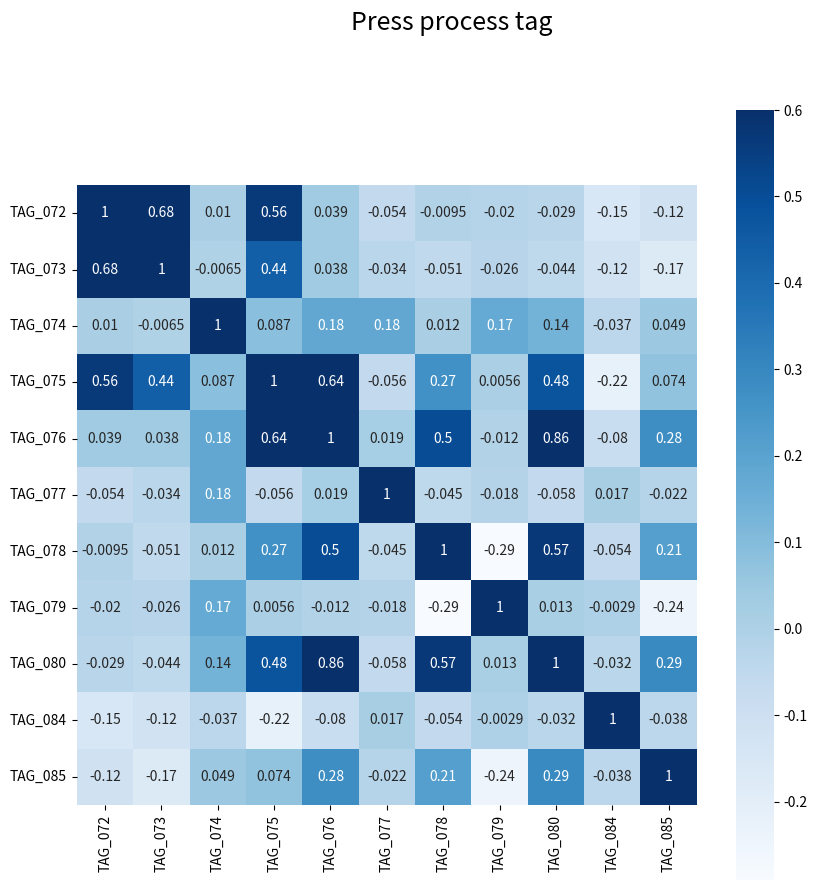

In [282]:
# MeasDate 제외한 모든 컬럼과 PM10(Target value)와의 상관관계 heatmap화
fig = plt.figure()
flg,ax = plt.subplots(figsize=[10, 10])
process_3_corr = process_3.corr()
sns.heatmap(process_3_corr, annot=True, square=True, vmax=0.6, cmap='Blues')
plt.suptitle('Press process tag', fontsize=18)

# Press process 로지스틱 회귀분석

In [ ]:
TAG_072+TAG_073+TAG_074+TAG_075+TAG_076+TAG_077+TAG_078+TAG_079+TAG_080+TAG_084+TAG_085

In [288]:
df.head()

,datetime,TAG_001,TAG_002,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_011,TAG_012,...,TAG_185,TAG_186,TAG_187,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,cause
0,2020-12-31 15:00:00,14.998843,3.627277,3.638380,150.183147,0.0,0.0,0.0,100.0,91.560300,...,40.445474,40.286198,39.838523,40.442122,0.099745,0.232226,0.032899,0.0,81.412858,정상
1,2020-12-31 15:01:00,14.998953,3.629643,3.638348,150.200404,0.0,0.0,0.0,100.0,91.561358,...,39.907138,40.272303,39.846898,40.621681,0.099763,0.232226,0.032911,0.0,81.472849,정상
2,2020-12-31 15:02:00,14.999063,3.632929,3.638315,150.217660,0.0,0.0,0.0,100.0,91.562416,...,39.346890,40.258407,39.855274,40.774376,0.099781,0.232226,0.032922,0.0,81.344790,정상
3,2020-12-31 15:03:00,14.999173,3.607274,3.638283,150.234917,0.0,0.0,0.0,100.0,91.563475,...,38.762017,40.244512,39.863649,40.744808,0.099799,0.232226,0.032934,0.0,81.530460,정상
4,2020-12-31 15:04:00,14.999284,3.651782,3.638250,150.252173,0.0,0.0,0.0,100.0,91.564533,...,39.265926,40.230616,39.872025,40.681057,0.099817,0.232226,0.032946,0.0,81.884934,정상


In [334]:
process_3 = pd.concat([df.iloc[388906:,53:64],df.iloc[388906:,-1]],axis=1)
process_3.reset_index(inplace=True)
process_3 = process_3.drop('index',axis=1)
process_3.head()

,TAG_072,TAG_073,TAG_074,TAG_075,TAG_076,TAG_077,TAG_078,TAG_079,TAG_080,TAG_084,TAG_085,cause
0,89.225517,87.158203,9.051023,97.851261,101.860246,13.842146,53.362756,134.371261,100.0,0.074428,534.233622,정상
1,89.225598,87.158203,9.051043,97.850796,101.858968,13.842788,53.362351,134.398748,100.0,0.074639,534.498790,정상
2,89.225679,87.158203,9.051064,97.850331,101.857691,13.843430,53.361947,134.426232,100.0,0.074850,533.901356,정상
3,89.225760,87.158203,9.051085,97.849866,101.856414,13.844072,53.361542,134.453718,100.0,0.075061,533.303924,정상
4,89.225841,87.158203,9.051105,97.849401,101.855137,13.844714,53.361137,134.481205,100.0,0.075272,532.706491,정상


In [363]:
process_3['cause'].replace(['DOWN TIME', '계획보수', '공전', '공정청소',  '정상' ,'중지', '지종교체', '한전PEAK절전'], 0, inplace=True)
process_3['cause'].replace('불량중지', 1, inplace=True)

In [352]:
process_3.head()

,TAG_072,TAG_073,TAG_074,TAG_075,TAG_076,TAG_077,TAG_078,TAG_079,TAG_080,TAG_084,TAG_085,cause
0,89.225517,87.158203,9.051023,97.851261,101.860246,13.842146,53.362756,134.371261,100.0,0.074428,534.233622,정상
1,89.225598,87.158203,9.051043,97.850796,101.858968,13.842788,53.362351,134.398748,100.0,0.074639,534.498790,정상
2,89.225679,87.158203,9.051064,97.850331,101.857691,13.843430,53.361947,134.426232,100.0,0.074850,533.901356,정상
3,89.225760,87.158203,9.051085,97.849866,101.856414,13.844072,53.361542,134.453718,100.0,0.075061,533.303924,정상
4,89.225841,87.158203,9.051105,97.849401,101.855137,13.844714,53.361137,134.481205,100.0,0.075272,532.706491,정상


In [365]:
process_3[(process_3['cause']==1)==False]

,TAG_072,TAG_073,TAG_074,TAG_075,TAG_076,TAG_077,TAG_078,TAG_079,TAG_080,TAG_084,TAG_085,cause
0,89.225517,87.158203,9.051023,97.851261,101.860246,13.842146,53.362756,134.371261,100.000000,0.074428,534.233622,0
1,89.225598,87.158203,9.051043,97.850796,101.858968,13.842788,53.362351,134.398748,100.000000,0.074639,534.498790,0
2,89.225679,87.158203,9.051064,97.850331,101.857691,13.843430,53.361947,134.426232,100.000000,0.074850,533.901356,0
3,89.225760,87.158203,9.051085,97.849866,101.856414,13.844072,53.361542,134.453718,100.000000,0.075061,533.303924,0
4,89.225841,87.158203,9.051105,97.849401,101.855137,13.844714,53.361137,134.481205,100.000000,0.075272,532.706491,0
...,...,...,...,...,...,...,...,...,...,...,...,...
132457,88.874023,86.786309,9.057553,97.388418,101.341399,14.014971,52.946274,135.912579,99.915364,0.000000,523.196386,0
132458,88.874005,86.786170,9.057522,97.388476,101.341364,14.014948,52.946820,135.889669,99.915149,0.000000,523.196386,0
132459,88.873987,86.786031,9.057491,97.388534,101.341330,14.014925,52.947365,135.866762,99.914935,0.000000,523.196386,0
132460,88.873970,86.785892,9.057460,97.388592,101.341295,14.014903,52.947911,135.843855,99.914721,0.000000,523.196386,0


In [366]:
print(np.unique(process_3['cause']))

[0 1]


In [367]:
process_3.dtypes

TAG_072    float64
TAG_073    float64
TAG_074    float64
TAG_075    float64
TAG_076    float64
TAG_077    float64
TAG_078    float64
TAG_079    float64
TAG_080    float64
TAG_084    float64
TAG_085    float64
cause        int64
dtype: object

In [368]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(process_3, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (92723, 12)
test data size : (39739, 12)


In [370]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트 = “1”

log_model = Logit.from_formula("""cause ~ TAG_072+TAG_073+TAG_074+TAG_075+TAG_076+TAG_077+\
                                TAG_078+TAG_079+TAG_080+TAG_084+TAG_085""", process_3)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())
# std err : 모평균으로부터 평균적으로 벗어난 정도
# P>|z| 잘못 말할 가능성
# coef 공분산
# 잔차 : 실측치 - 예측치
# 오차 : 모평균 - 표본평균
# 편차 : 평균과의 거리
# 모든 숫자는 방향을 보고 크기를 보는 것
# 커질 수록 안 좋다 -> 거리가 멀어짐

Optimization terminated successfully.
         Current function value: 0.055671
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  cause   No. Observations:               132462
Model:                          Logit   Df Residuals:                   132450
Method:                           MLE   Df Model:                           11
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.1455
Time:                        12:00:44   Log-Likelihood:                -7374.3
converged:                       True   LL-Null:                       -8629.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.5797     15.360      4.465      0.000      38.474      98.685
TAG_072        1.1787      0

In [375]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    #print(v_data.head()) <- Text format... 식별 불편
    # v_data.head()  <- 직접 적용 안됨

In [377]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)

# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과 \n", y_pred_train_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["cause"], y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)

# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(),"\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["cause"],y_pred_test_class)),"\n")

Train 예측 결과 
 18652     0
61333     0
27452     0
111884    0
37969     0
dtype: int64 

Confusion Matrix: 
[[91585    38]
 [ 1081    19]] 

Test 예측 결과 
 25011    0
83733    0
83754    0
88989    0
2991     0
dtype: int64 

Confusion Matrix: 
[[39233    12]
 [  475    19]] 



In [380]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["cause"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["cause"],y_pred_train_class)),"\n")
print(classification_report(df_train["cause"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["cause"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["cause"],y_pred_test_class)),"\n")
print(classification_report(df_test["cause"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.988

Confusion Matrix: 
[[91585    38]
 [ 1081    19]] 

              precision    recall  f1-score   support

           0      0.988     1.000     0.994     91623
           1      0.333     0.017     0.033      1100

    accuracy                          0.988     92723
   macro avg      0.661     0.508     0.513     92723
weighted avg      0.981     0.988     0.983     92723

Test 예측/분류 결과
Accuracy: 0.988

Confusion Matrix: 
[[39233    12]
 [  475    19]] 

              precision    recall  f1-score   support

           0      0.988     1.000     0.994     39245
           1      0.613     0.038     0.072       494

    accuracy                          0.988     39739
   macro avg      0.800     0.519     0.533     39739
weighted avg      0.983     0.988     0.982     39739



In [383]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print("Train 예측/분류 결과")

# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["cause"], y_pred_test_class, target_names=['중지', '불량중지'], digits=3))

print("Test 예측/분류 결과")
# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
# print(classification_report(df_test["BAD"], y_pred_test_class, digits=3))
print(classification_report(df_test["cause"], y_pred_test_class, target_names=['중지', '불량중지'], digits=3))

Train 예측/분류 결과
              precision    recall  f1-score   support

          중지      0.988     1.000     0.994     39245
        불량중지      0.613     0.038     0.072       494

    accuracy                          0.988     39739
   macro avg      0.800     0.519     0.533     39739
weighted avg      0.983     0.988     0.982     39739

Test 예측/분류 결과
              precision    recall  f1-score   support

          중지      0.988     1.000     0.994     39245
        불량중지      0.613     0.038     0.072       494

    accuracy                          0.988     39739
   macro avg      0.800     0.519     0.533     39739
weighted avg      0.983     0.988     0.982     39739



<AxesSubplot:>

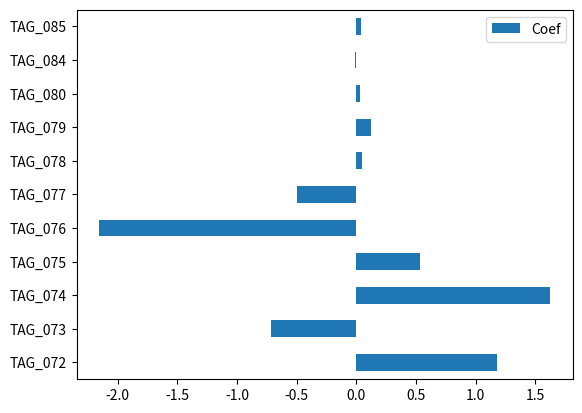

In [384]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")
# df_logistic_coef.plot.barh(y = "Coef", figsize=(10,6))


In [10]:
df_raw = pd.read_csv('/home/piai/바탕화면/TAG 12~14 이상치/tag_before.csv', encoding='euc-kr')
df_raw.drop('Unnamed: 0',axis=1,inplace=True)
df_raw.tail()

,datetime,TAG_001,TAG_002,TAG_003,TAG_004,TAG_005,TAG_006,TAG_007,TAG_008,TAG_009,...,TAG_188,TAG_189,TAG_190,TAG_191,TAG_192,TAG_193,TAG_194,TAG_195,TAG_196,cause
208054,2021-05-25 05:26:00,13.880380,3.696824,0.0,3.738443,130.924301,32.015216,0.0,0.0,X,...,40.939249,0.120235,0.480703,0.011573,0.047129,35.261875,37.329421,48.148741,37.353651,정상
208055,2021-05-25 05:27:00,13.879545,3.695833,0.0,3.738461,130.934616,32.004384,0.0,0.0,X,...,43.186651,0.119821,0.480483,0.011335,0.047072,35.388196,37.323812,48.145355,37.34837,정상
208056,2021-05-25 05:28:00,13.878710,3.694774,0.0,3.738478,130.944931,31.993552,0.0,0.0,X,...,43.105887,0.119407,0.480263,0.011096,0.047015,34.546563,37.318202,48.141968,37.343088,정상
208057,2021-05-25 05:29:00,13.877875,3.693716,0.0,3.738495,130.955245,31.982720,0.0,0.0,X,...,39.983363,0.118992,0.480044,0.010858,0.046958,35.050686,37.312593,48.138582,37.337807,정상
208058,2021-05-25 05:30:00,13.877041,3.692657,0.0,3.738512,130.965560,31.971888,0.0,0.0,X,...,36.779855,0.118578,0.479824,0.010619,0.046901,36.462541,37.306983,48.135196,37.332526,정상


# 2-sample t-test를 위한 데이터프레임 만들기

In [23]:
stop = stop_list[(stop_list['cause']=='불량중지')==True]
stop['시간차이']=stop['end_date']-stop['start_date']
stop

,facility,cause,start_date,end_date,시간차이
3,3번 PRESS,불량중지,2021-01-03 21:39:00,2021-01-03 22:24:00,0 days 00:45:00
6,1군 DRYER,불량중지,2021-01-08 13:09:00,2021-01-08 13:37:00,0 days 00:28:00
8,4번 PRESS,불량중지,2021-01-10 07:30:00,2021-01-10 07:45:00,0 days 00:15:00
9,1군 DRYER,불량중지,2021-01-11 04:38:00,2021-01-11 05:17:00,0 days 00:39:00
10,4번 PRESS,불량중지,2021-01-11 06:41:00,2021-01-11 07:12:00,0 days 00:31:00
...,...,...,...,...,...
504,CALENDER,불량중지,2021-12-27 20:20:00,2021-12-27 20:26:00,0 days 00:06:00
505,6군 DRYER,불량중지,2021-12-28 03:19:00,2021-12-28 03:36:00,0 days 00:17:00
506,2군 DRYER,불량중지,2021-12-28 14:16:00,2021-12-28 14:52:00,0 days 00:36:00
507,1군 DRYER,불량중지,2021-12-28 16:53:00,2021-12-28 17:35:00,0 days 00:42:00


In [13]:
TAG_001 = pd.concat([df_raw['cause'],df_raw['datetime'],df_raw['TAG_001']],axis=1)
TAG_001["cause"].replace(['계획보수','DOWN TIME','REBUILD','공정청소','공전','중지','한전PEAK절전','지종교체'], '정상', inplace=True)

In [14]:
TAG_001_stop = TAG_001[(TAG_001['cause']=='불량중지')==True]
TAG_001_normal = TAG_001[(TAG_001['cause']!='불량중지')==True]

In [16]:
TAG_001_stop

,cause,datetime,TAG_001
4705,불량중지,2021-01-03 21:39:00,14.865404
4706,불량중지,2021-01-03 21:40:00,14.865919
4707,불량중지,2021-01-03 21:41:00,14.866433
4708,불량중지,2021-01-03 21:42:00,14.866948
4709,불량중지,2021-01-03 21:43:00,14.867462
...,...,...,...
204710,불량중지,2021-05-22 21:38:00,13.996660
204711,불량중지,2021-05-22 21:39:00,13.996946
204712,불량중지,2021-05-22 21:40:00,13.997232
204713,불량중지,2021-05-22 21:41:00,13.997518


In [19]:
TAG_001_normal# 여기서 육십분전꺼 가져오자 
TAG_001

,cause,datetime,TAG_001
0,정상,2020-12-31 15:00:00,14.998843
1,정상,2020-12-31 15:01:00,14.998953
2,정상,2020-12-31 15:02:00,14.999063
3,정상,2020-12-31 15:03:00,14.999173
4,정상,2020-12-31 15:04:00,14.999284
...,...,...,...
208054,정상,2021-05-25 05:26:00,13.880380
208055,정상,2021-05-25 05:27:00,13.879545
208056,정상,2021-05-25 05:28:00,13.878710
208057,정상,2021-05-25 05:29:00,13.877875


In [62]:
# 2sample T-test


43200